In [133]:
import pandas as pd 
import numpy as np 

In [134]:
data = pd.read_csv('D:\\Kaggle\\糖尿病预测\\archive\\diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [135]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [137]:
#0值替换为NAN并清除
data['Glucose'].replace(0,np.nan,inplace=True)
data['BloodPressure'].replace(0,np.nan,inplace=True)
data['SkinThickness'].replace(0,np.nan,inplace=True)
data['Insulin'].replace(0,np.nan,inplace=True)
data['BMI'].replace(0,np.nan,inplace=True)
data['Pregnancies'].replace(0,np.nan,inplace=True)
data['DiabetesPedigreeFunction'].replace(0,np.nan,inplace=True)
data['Age'].replace(0,np.nan,inplace=True)


C:\Windows\Temp\ipykernel_13120\2818530273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].replace(0,np.nan,inplace=True)
C:\Windows\Temp\ipykernel_13120\2818530273.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [138]:
data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

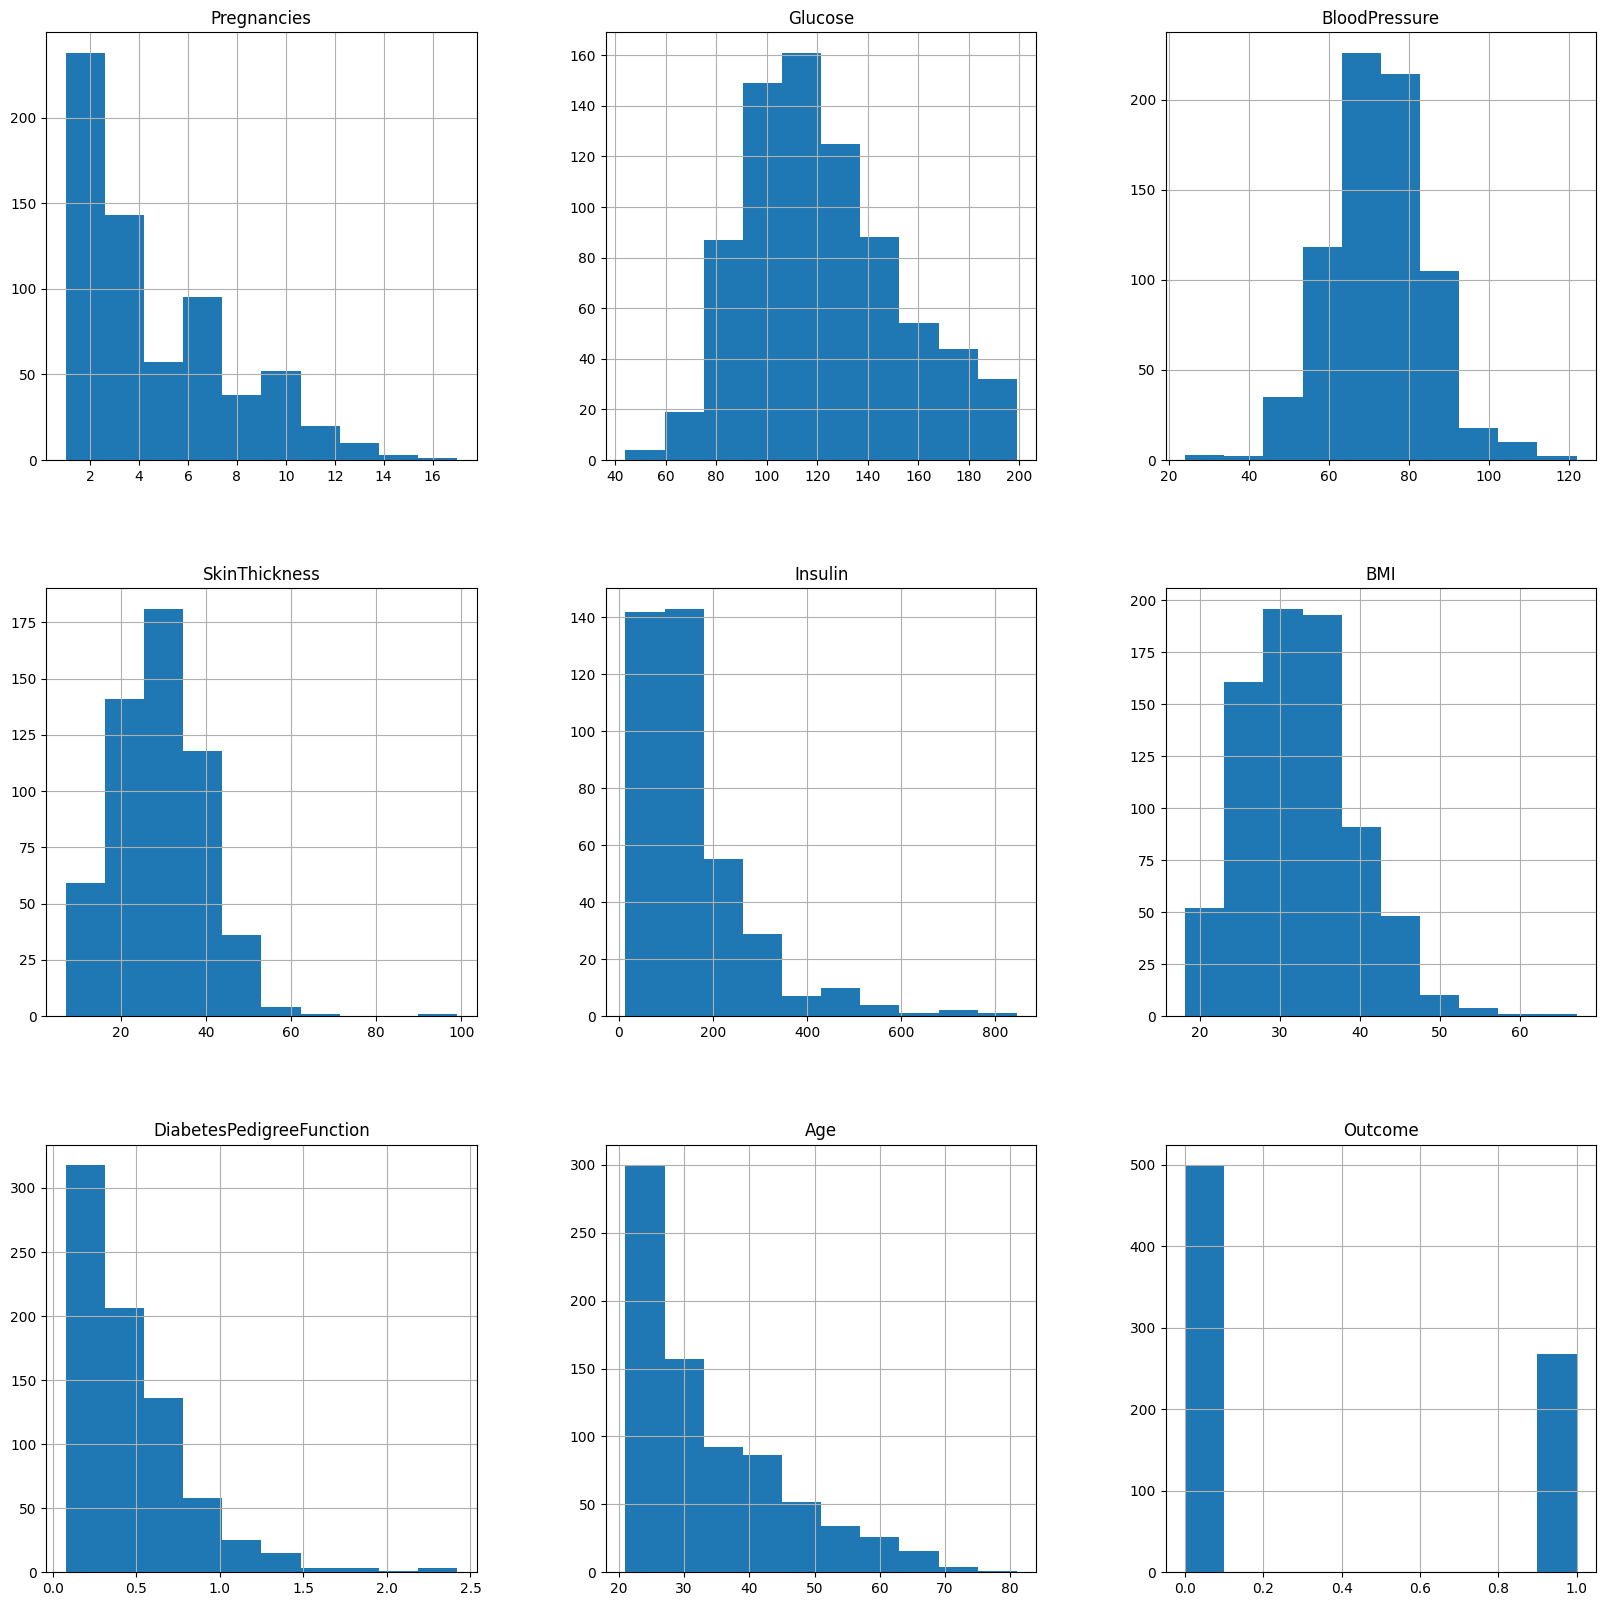

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
p = data.hist(figsize = (20,20))

In [140]:
#用平均数填充缺失值
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)                    
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)
data['Pregnancies'].fillna(data['Pregnancies'].mean(),inplace=True)


C:\Windows\Temp\ipykernel_13120\166953026.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI'].fillna(data['BMI'].mean(),inplace=True)


In [141]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

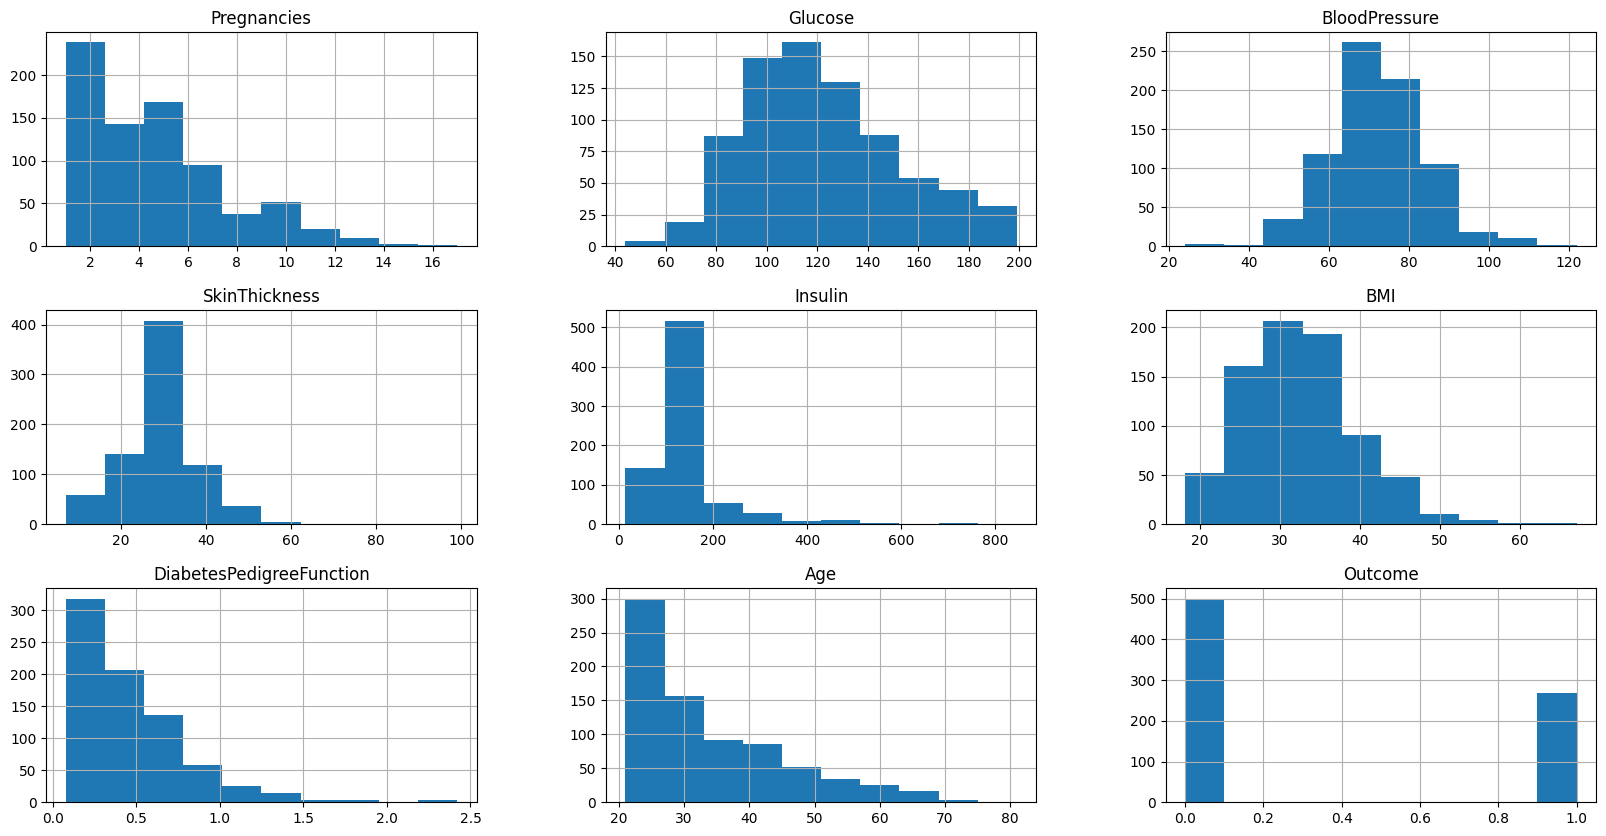

In [142]:
p = data.hist(figsize=(20,10))

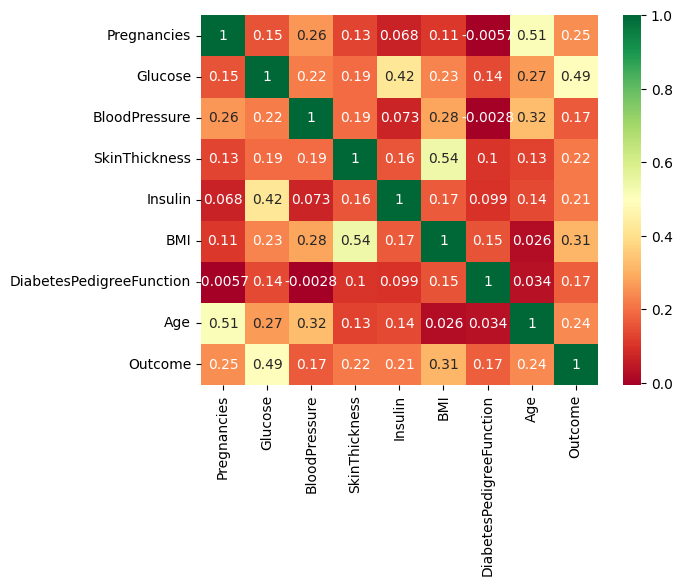

In [143]:
#变量多数呈右偏分布，非糖尿病患者是糖尿病患者的两倍左右
plt.figuresize=(15,6)
hot_map = sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing  import StandardScaler 
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [145]:
model_1 = LogisticRegression(random_state=42)
model_1.fit(X_train_scaled,y_train)
y_pred_1 = model_1.predict(X_test_scaled)
#print(y_pred_1)
accuracy_1 = accuracy_score(y_test,y_pred_1)
print(accuracy_1)

0.7705627705627706


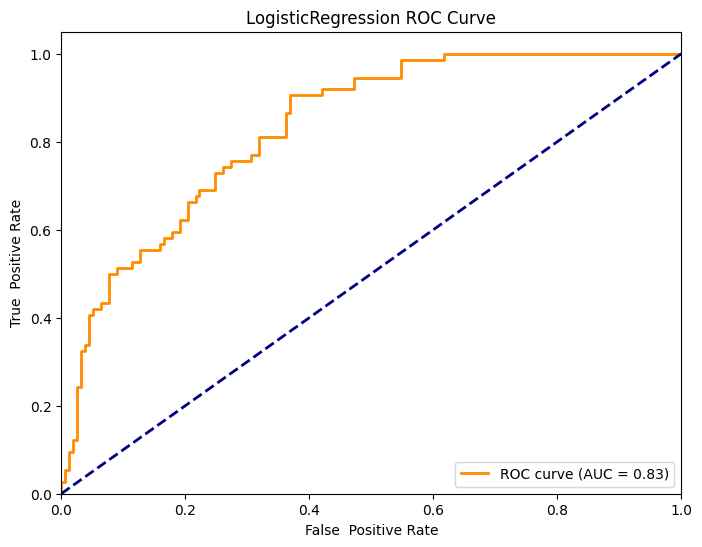

In [146]:
# 获取预测概率（注意取正类的概率） 
y_score_1 = model_1.predict_proba(X_test_scaled)[:,  1]
 
# 计算ROC曲线 
fpr, tpr, thresholds = roc_curve(y_test, y_score_1)
roc_auc = auc(fpr, tpr)
 
# 绘制ROC曲线 
plt.figure(figsize=(8,  6))
plt.plot(fpr,  tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,  1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,  1.0])
plt.ylim([0.0,  1.05])
plt.xlabel('False  Positive Rate')
plt.ylabel('True  Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.legend(loc="lower right")
plt.show() 

In [147]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test_scaled)
accuracy_2 = accuracy_score(y_test,y_pred_2)
print(accuracy_2)

0.6796536796536796


d:\program\python3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


d:\program\python3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


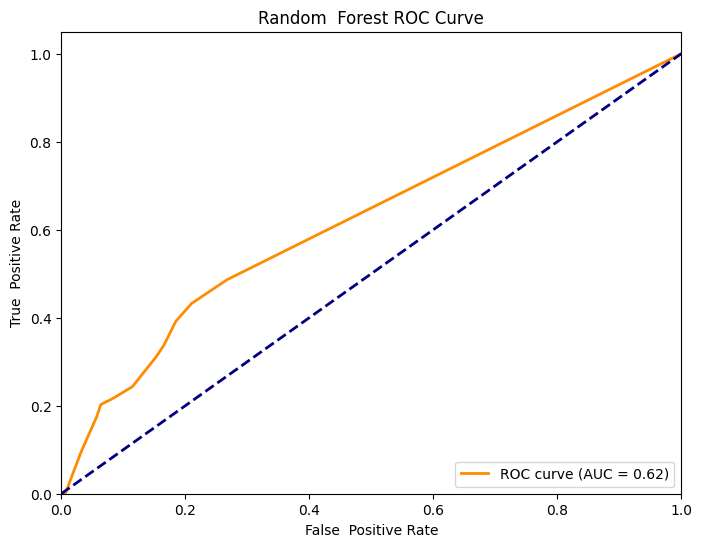

In [148]:
# 获取预测概率（注意取正类的概率） 
y_score_2 = model_2.predict_proba(X_test_scaled)[:,  1]
 
# 计算ROC曲线 
fpr, tpr, thresholds = roc_curve(y_test, y_score_2)
roc_auc = auc(fpr, tpr)
 
# 绘制ROC曲线 
plt.figure(figsize=(8,  6))
plt.plot(fpr,  tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,  1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,  1.0])
plt.ylim([0.0,  1.05])
plt.xlabel('False  Positive Rate')
plt.ylabel('True  Positive Rate')
plt.title('Random  Forest ROC Curve')
plt.legend(loc="lower right")
plt.show() 